<a href="https://colab.research.google.com/github/hugozub/MIAD/blob/main/Pra%CC%80ctica_22_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.


In [1]:
import pandas as pd
from scipy.stats import shapiro
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox


In [2]:
# 1.Cargar dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

# 2. Seleccionar alcohol
# Prueba de normalidad con la columna "alcohol"

x = wine_df["alcohol"].to_numpy()
stat, p_value = shapiro(x)


print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p_value)
print("\n alpha = 0.05 \n")
print(p_value, " < 0.05, por tanto los datos no siguen una distribución normal", )

Estadístico de Shapiro-Wilk: 0.9818041416927711
Valor p: 0.020047981728854945

 alpha = 0.05 

0.020047981728854945  < 0.05, por tanto los datos no siguen una distribución normal


In [3]:
# 4.Normalización Min - Max
x_min = x.min()
x_max = x.max()
x_norm = (x - x_min) / (x_max - x_min)
print(f"Rango normalizado -> min={x_norm.min()}, max={x_norm.max()}")


Rango normalizado -> min=0.0, max=1.0


In [4]:
# 5.Prueba de normalizado
stat_norm, p_norm = shapiro(x_norm)
print(f"Shapiro-Wilk (normalizado): estadístico={stat_norm:.6f} | p-valor={p_norm:.6g}")
print(p_norm, " < 0.05, por tanto los datos no siguen una distribución normal", )

Shapiro-Wilk (normalizado): estadístico=0.981804 | p-valor=0.020048
0.020047981728854858  < 0.05, por tanto los datos no siguen una distribución normal


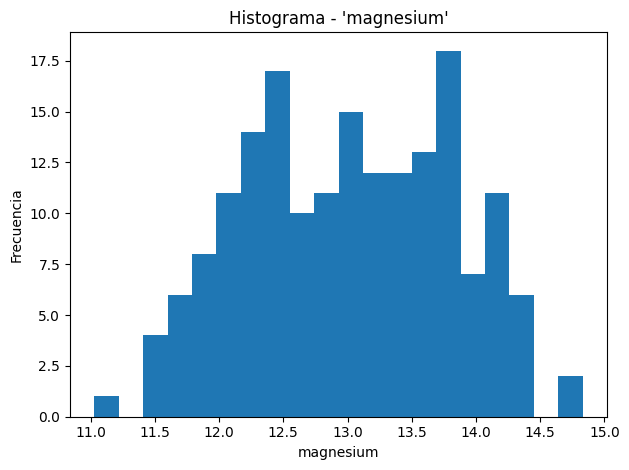

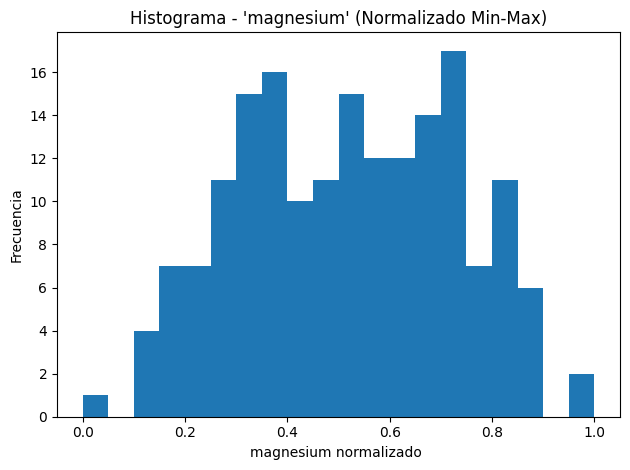

In [5]:
# 6 Graficar los resultados
plt.figure()
plt.hist(x, bins=20)
plt.title("Histograma - 'magnesium'")
plt.xlabel("magnesium")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(x_norm, bins=20)
plt.title("Histograma - 'magnesium' (Normalizado Min-Max)")
plt.xlabel("magnesium normalizado ")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
- La distribución no se ve afecta, como se ve en la prueba de normalización antes y después de las pruebas


2. ¿Qué interpretas del p-valor antes y después de la normalización?
- Sigue teniendo el mismo valor, no cambia la distribución, ni como los datos son interpretados, unicamente cambia el valor de 0-1

# Ejercicio 2: Normalización Z-Score

Instrucciones:

1.	Cargar el dataset wine de sklearn.

2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).

3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.

4.	Aplicar la normalización Z-Score a los datos seleccionados.

5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

7.	Responder las preguntas siguientes.


Preguntas:

1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



In [6]:
# 1.Cargar dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

# 2. Selecciona malic_acid
# 3.Prueba de normalidad con la columna "magnesium"
x = wine_df["malic_acid"].to_numpy()
stat, p_value = shapiro(x)

print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p_value)
print("\n alpha = 0.05 \n")
print(p_value, " < 0.05, por tanto los datos no siguen una distribución normal", )

Estadístico de Shapiro-Wilk: 0.8887839752895415
Valor p: 2.945800703600761e-10

 alpha = 0.05 

2.945800703600761e-10  < 0.05, por tanto los datos no siguen una distribución normal


In [7]:
# 4.Aplicar normalizacion Z-Score
x_mean = x.mean()
x_std = x.std()
x_zscore = (x - x_mean) / x_std

print(f"Rango original: min={x.min():.4f}, max={x.max():.4f}")
print(f"Rango z-score:  min={x_zscore.min():.4f}, max={x_zscore.max():.4f}")

Rango original: min=0.7400, max=5.8000
Rango z-score:  min=-1.4330, max=3.1092


In [8]:
# 5.Aplicar shapiro de nuevo
stat, p_value = shapiro(x_zscore)
print("Estadístico de Shapiro-Wilk:", stat)
print(p_value, " < 0.05, por tanto los datos no siguen una distribución normal")

Estadístico de Shapiro-Wilk: 0.8887839752895408
2.9458007036005247e-10  < 0.05, por tanto los datos no siguen una distribución normal


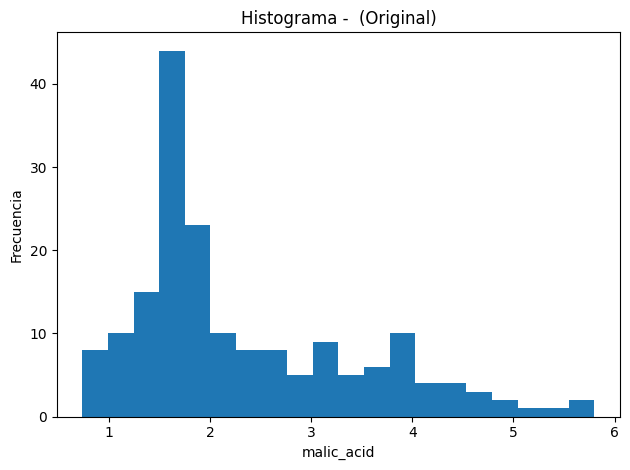

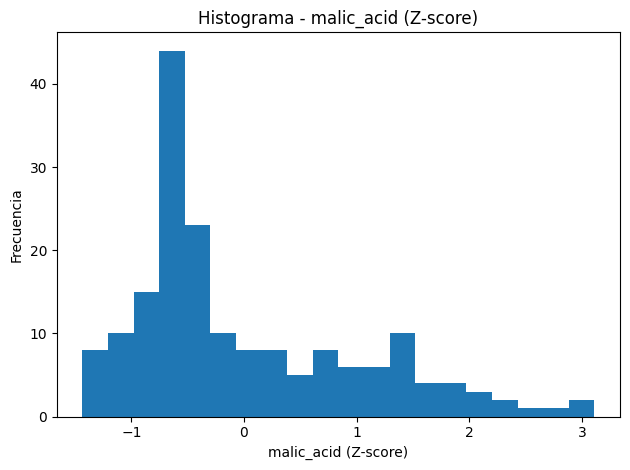

In [9]:
# 6) Graficar distribuciones
plt.figure()
plt.hist(x, bins=20)
plt.title(f"Histograma - {""} (Original)")
plt.xlabel("malic_acid")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(x_zscore, bins=20)
plt.title(f"Histograma - {"malic_acid"} (Z-score)")
plt.xlabel(f"{"malic_acid"} (Z-score)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Preguntas:

 1. ¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
- Las distribuciones son las mismas, se puede notar en los las pruebas de shapiro

2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?
-Es la desviación de los datos respecto a la media,es decir, cuantas veces está alejados los datos respecto a la media en termino de unidades de desviación estandar

# Ejercicio 3: Transformación Logarítmica


Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.

2.	Aplicar una transformación logarítmica (np.log) a los datos.

3.	Realizar una prueba de normalidad sobre los datos originales y transformados.

4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.


Preguntas:

1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?

2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


In [10]:
# 1.Carga un conjunto de datos aleatorio
data = np.random.randint(1,101,100)

# 2.Aplicar transformación logaritmica
data_log = np.log(data)

# 3.Realizar prueba de normalidad original
stat, p_value = shapiro(data)
print("Estadístico de Shapiro-Wilk original:", stat)
print("Valor p:", p_value)

# Prueba normalidad Transofrmados
stat, p_value = shapiro(data_log)
print("\nEstadístico de Shapiro-Wilk transformado log:", stat)
print("Valor p:", p_value)

Estadístico de Shapiro-Wilk original: 0.9559862552717331
Valor p: 0.0021021450299918408

Estadístico de Shapiro-Wilk transformado log: 0.841561050078618
Valor p: 5.856431852638694e-09


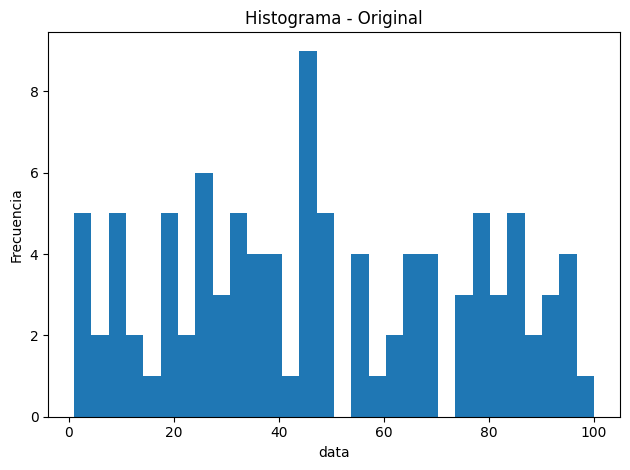

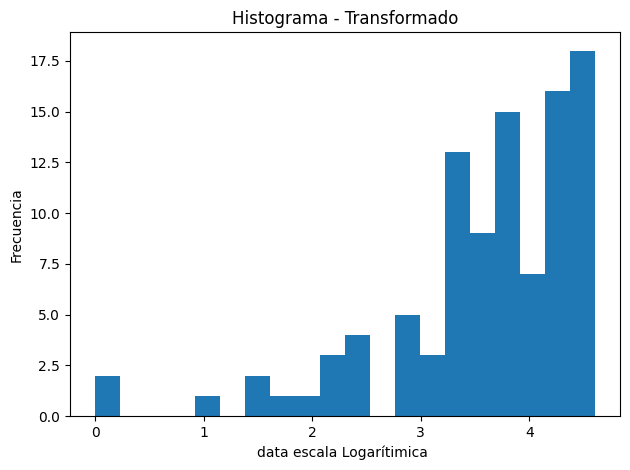

In [11]:
# 4 Graficar los resultados
plt.figure()
plt.hist(data, bins=30)
plt.title("Histograma - Original")
plt.xlabel("data")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(data_log, bins=20)
plt.title("Histograma - Transformado")
plt.xlabel("data escala Logarítimica ")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Preguntas:

1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?
- Ahora sigue una distribución logarítimica, empezando con valores cercanos al cero e incrementado logarítimicamente

2. ¿Qué interpretas del p-val
- El p_valule del original es mayor que el de la logarítimica, quiere decir que la transformación logarítimica aleja los datos de parecer una distribución normal

# Ejercicio 4: Transformación Raíz Cuadrada

Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.

2.	Aplicar una transformación de raíz cuadrada a los datos.

3.	Realizar una prueba de normalidad sobre los datos originales y transformados.

4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.


Preguntas:

1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?

2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


In [12]:
# 1.Carga un conjunto de datos aleatorio
data = np.random.randint(1,101,100)

# 2.Aplicar transformación raíz cuadrada
data_sqrt = np.sqrt(data)

# 3.Realizar prueba de normalidad original
stat, p_value = shapiro(data)
print("Estadístico de Shapiro-Wilk original:", stat)
print("Valor p:", p_value)

# Prueba normalidad Transofrmados
stat, p_value = shapiro(data_sqrt)
print("\nEstadístico de Shapiro-Wilk transformado raíz cuadrada:", stat)
print("Valor p:", p_value)

Estadístico de Shapiro-Wilk original: 0.9279738849362078
Valor p: 3.826402395292803e-05

Estadístico de Shapiro-Wilk transformado raíz cuadrada: 0.904348884050153
Valor p: 2.2772721296217906e-06


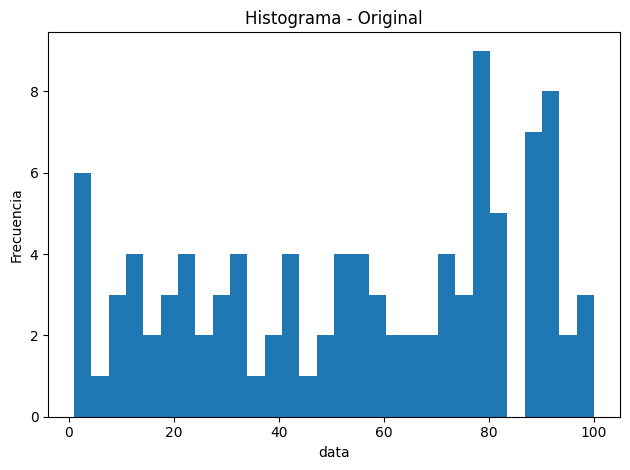

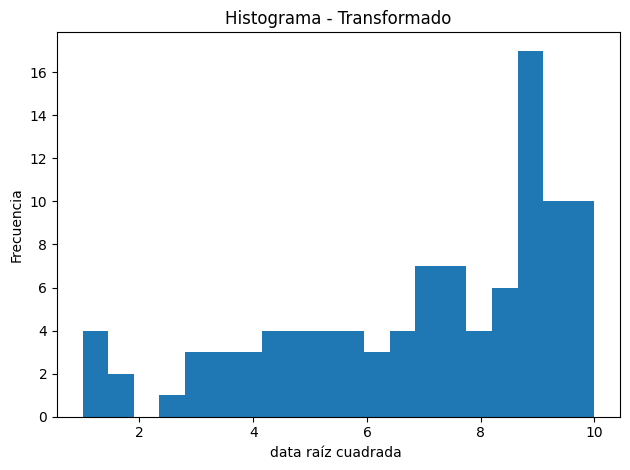

In [13]:
# 4 Graficar los resultados
plt.figure()
plt.hist(data, bins=30)
plt.title("Histograma - Original")
plt.xlabel("data")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(data_sqrt, bins=20)
plt.title("Histograma - Transformado")
plt.xlabel("data raíz cuadrada ")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Preguntas:


1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
- Ahora sigue una distribución similar a la de la raíz cuadrada, cambia la frecuencia y los valores del eje x

2. ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?
- Los une a dentro de un mismo rango del eje x, dando como resultado un incremento casi líneal, sin cambios bruscos de dirección

# Ejercicio 5: Transformación Box-Cox

Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.

2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.

3.	Realizar una prueba de normalidad sobre los datos originales y transformados.

4.	Graficar los datos originales y transformados utilizando matplotlib.

5.	Responder las preguntas siguientes.


Preguntas:

1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


In [14]:
import scipy.stats as stats
# 1.Carga un conjunto de datos aleatorio
data = np.random.randint(1,101,100)

# 2.Aplicar transformación raíz cuadrada
x_boxcox, lambda_opt = stats.boxcox(x)

# 3.Realizar prueba de normalidad original
stats, p_value = shapiro(data)
print("Estadístico de Shapiro-Wilk original:", stat)
print("Valor p:", p_value)

# Prueba normalidad Transofrmados
stat, p_value = shapiro(x_boxcox)
print("\nEstadístico de Shapiro-Wilk transformado boxcox:", stat)
print("Valor p:", p_value)

Estadístico de Shapiro-Wilk original: 0.904348884050153
Valor p: 0.00014613639956413696

Estadístico de Shapiro-Wilk transformado boxcox: 0.9735392433903312
Valor p: 0.0018114351490288523


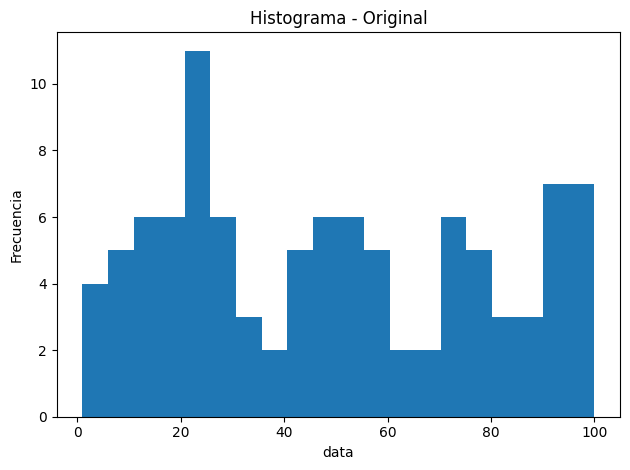

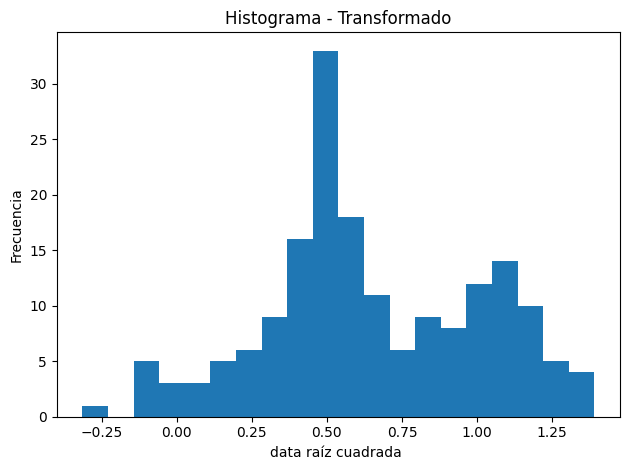

In [15]:
# 4 Graficar los resultados
plt.figure()
plt.hist(data, bins=20)
plt.title("Histograma - Original")
plt.xlabel("data")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(x_boxcox, bins=20)
plt.title("Histograma - Transformado")
plt.xlabel("data raíz cuadrada ")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Preguntas:

1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
- La transformación se acerca a una distribución normal, en la prueba de shapiro es visible el cambio que hay, después de la transformación se acerca el p_value a 0.05, más de lo que anteriormente tenía

2. ¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
- Es el valor utilizado para transformar los datos y se acerque a ser una distribución normal
